In [1]:
import acoular

In [3]:
from os import path

from acoular import MicGeom, Mixer, PointSource, WNoiseGenerator, WriteH5
from acoular import __file__ as bpath

sfreq = 51200
duration = 1
nsamples = duration * sfreq
micgeofile = path.join(path.split(bpath)[0], 'xml', 'array_64.xml')
h5savefile = 'three_sources.h5'

m = MicGeom(from_file=micgeofile)
n1 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
n2 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2, rms=0.7)
n3 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5)
p1 = PointSource(signal=n1, mics=m, loc=(-0.1, -0.1, 0.3))
p2 = PointSource(signal=n2, mics=m, loc=(0.15, 0, 0.3))
p3 = PointSource(signal=n3, mics=m, loc=(0, 0.1, 0.3))
p = Mixer(source=p1, sources=[p2, p3])
wh5 = WriteH5(source=p, name=h5savefile)
wh5.save()

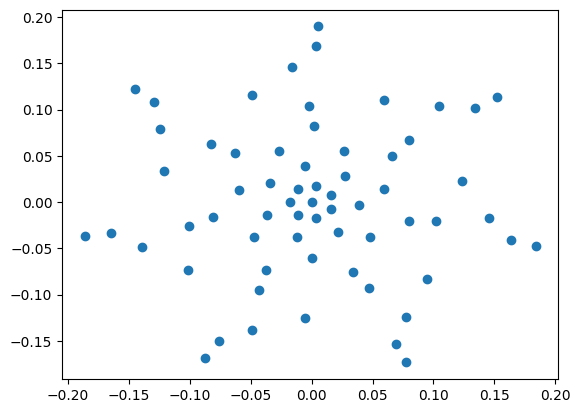

In [6]:
ts = acoular.TimeSamples( name='three_sources.h5' )
ps = acoular.PowerSpectra( time_data=ts, block_size=128, window='Hanning' )
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01 )
from os import path

micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')

mg = acoular.MicGeom( from_file=micgeofile )
import pylab as plt

plt.ion()
plt.plot(mg.mpos[0],mg.mpos[1],'o')


[('three_sources_cache.h5', 1)]
[('three_sources_cache.h5', 2)]


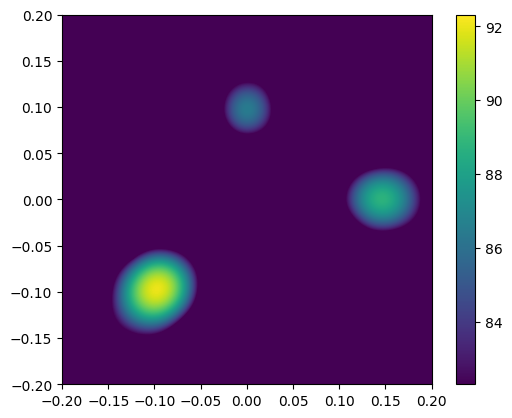

In [7]:
st = acoular.SteeringVector( grid=rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )
pm = bb.synthetic( 8000, 3 )
Lm = acoular.L_p( pm )
plt.figure() # open new figure

plt.imshow( Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), interpolation='bicubic')

plt.colorbar()